EXAMEN MONT CARLO DE L'ANNÉE DERNIÈRE 23_24

EXERCICE 1

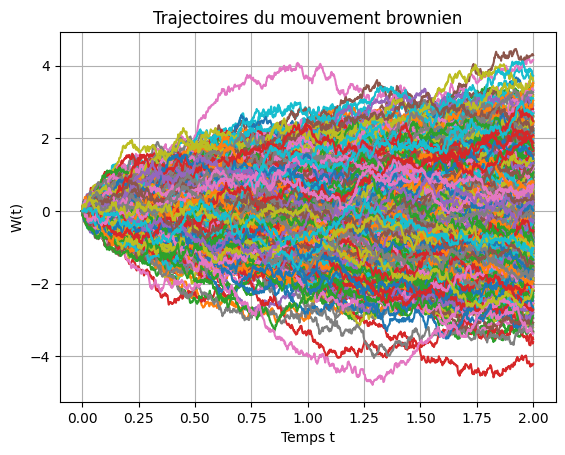

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def question1(T, N, Nmc, lambd):
    # Initialisation
    W = np.zeros(N+1)  # Tableau pour le mouvement brownien
    delta_t = T / N  # Pas de temps
    t = np.linspace(0, T, N+1)  # Création du vecteur temps
    last_value = np.zeros(Nmc)  # Dernière valeur du processus pour chaque simulation

    # Simulation de Nmc trajectoires de mouvement brownien
    for j in range(Nmc):
        for i in range(N):
            # Simuler un incrément aléatoire de mouvement brownien
            W[i+1] = W[i] + np.random.randn() * np.sqrt(delta_t)
        plt.plot(t, W)  # Tracer chaque trajectoire de W

    # Afficher le graphique
    plt.title("Trajectoires du mouvement brownien")
    plt.xlabel("Temps t")
    plt.ylabel("W(t)")
    plt.grid(True)
    plt.show()

# Paramètres de la simulation
T = 2  # Temps total
N = 1000  # Nombre de pas de temps
Nmc = 1000  # Nombre de simulations Monte Carlo
lambd = 2  # Non utilisé ici (valeur par défaut)

# Appeler la fonction pour exécuter la simulation
question1(T, N, Nmc, lambd)


In [ ]:
import numpy as np

# Paramètres
T = 2  # Horizon temporel
N = 100  # Nombre de pas de temps
Nmc = 1000  # Nombre de trajectoires Monte Carlo
lambda_value = 2  # Valeur de λ
dt = T / N  # Pas de temps

# Simulation du Mouvement Brownien
def simulate_brownian_motion():
    W = np.zeros((Nmc, N+1))  # Tableau pour stocker les trajectoires
    for i in range(Nmc):
        dW = np.random.normal(0, np.sqrt(dt), N)  # Incréments brownien
        W[i, 1:] = np.cumsum(dW)  # Calculer le mouvement brownien
    return W

# Calcul de P[|W_T| < 0.5]
def probability_WT_less_than_0_5(W):
    return np.mean(np.abs(W[:, -1]) < 0.5)

# Calcul de E[e^(λWT - λ^2T/2)]
def expected_value_lambda_WT(W, lambda_value):
    return np.mean(np.exp(lambda_value * W[:, -1] - 0.5 * lambda_value**2 * T))

# Main
W = simulate_brownian_motion()

# Calcul des deux résultats
P_WT_less_than_0_5 = probability_WT_less_than_0_5(W)
E_lambda_WT = expected_value_lambda_WT(W, lambda_value)

# Affichage des résultats
print(f"P[|W_T| < 0.5] : {P_WT_less_than_0_5:.4f}")
print(f"E[e^(λW_T - λ^2T/2)] : {E_lambda_WT:.4f}")

P[|W_T| < 0.5] : 0.2760
E[e^(λW_T - λ^2T/2)] : 1.5961


Espérance de W(T) = -0.0033942163016650257
Variance de W(T) = 4.7406102079216526


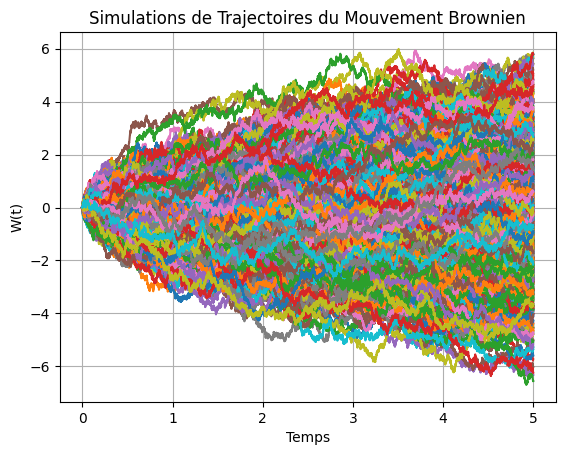

In [ ]:
# probleme2 td2
import numpy as np
import matplotlib.pyplot as plt
T = 5
N = 10000
dt = T / N
Nmc = 1000
last_value = []
for M in range(Nmc):
    W = [0]
    t = [0]
    for i in range(N):
        W.append(W[-1] + np.sqrt(dt) * np.random.normal(0, 1))
        t.append(t[-1] + dt)
    last_value.append(W[-1])
    plt.plot(t, W)
esperance_W = np.mean(last_value)
variance_W = np.var(last_value)

print("Espérance de W(T) =", esperance_W)
print("Variance de W(T) =", variance_W)
plt.title('Simulations de Trajectoires du Mouvement Brownien')
plt.xlabel('Temps')
plt.ylabel('W(t)')
plt.grid(True)

plt.show()

EXERCICE 2


Trajectory 1 : LHS = 81.12708218454583 , RHS = 78.0321876566799
Trajectory 2 : LHS = 12.510102267281315 , RHS = 12.446159999996668
Trajectory 3 : LHS = 2.818655315256199 , RHS = 2.7641247861830602


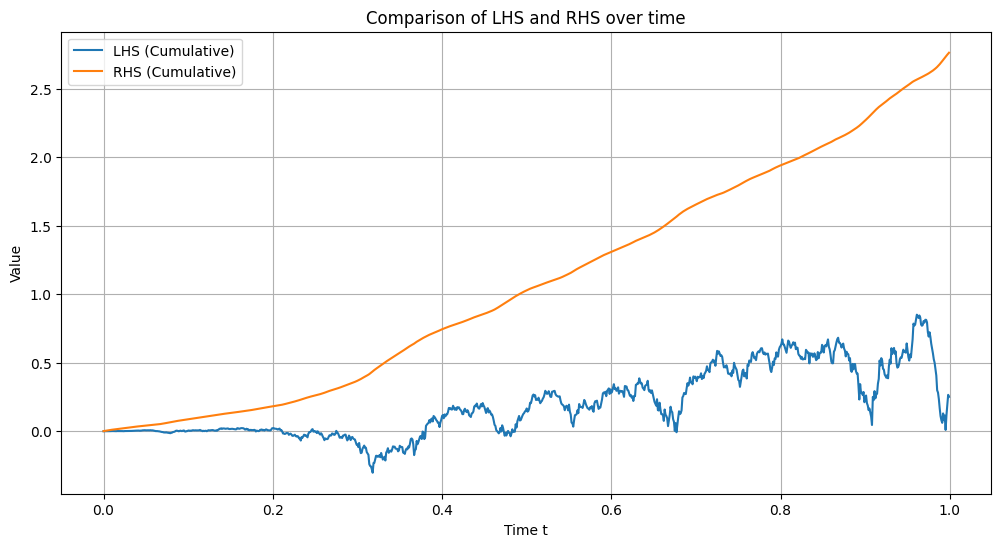

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 1  # Total time
N = 1000  # Number of time steps
Nmc = 3  # Number of trajectories to simulate

def simulate_formula_verification(T, N, Nmc):
    delta_t = T / N  # Time step size
    t = np.linspace(0, T, N+1)  # Time vector

    # Initialize arrays to store results
    lhs_results = []
    rhs_results = []

    for j in range(Nmc):
        # Simulate a Brownian motion trajectory
        W = np.zeros(N+1)
        for i in range(N):
            W[i+1] = W[i] + np.random.randn() * np.sqrt(delta_t)

        # Compute the left-hand side (LHS)
        exp_term = np.exp(-2 * W[-1])
        integral_dWt = np.sum(t[:-1] * np.exp(-2 * W[:-1]) * (W[1:] - W[:-1]))  # Stochastic integral
        lhs = T * exp_term + 2 * integral_dWt

        # Compute the right-hand side (RHS)
        integral_dt = np.sum(np.exp(-2 * W[:-1]) * (1 + 2 * t[:-1]) * delta_t)  # Deterministic integral
        rhs = integral_dt

        # Store results
        lhs_results.append(lhs)
        rhs_results.append(rhs)

        # Print comparison for this trajectory
        print("Trajectory", j+1, ": LHS =", lhs, ", RHS =", rhs)

    # Plot LHS and RHS over time for the last trajectory
    plt.figure(figsize=(12, 6))
    plt.plot(t[:-1], np.cumsum(t[:-1] * np.exp(-2 * W[:-1]) * (W[1:] - W[:-1])), label="LHS (Cumulative)")
    plt.plot(t[:-1], np.cumsum(np.exp(-2 * W[:-1]) * (1 + 2 * t[:-1]) * delta_t), label="RHS (Cumulative)")
    plt.title("Comparison of LHS and RHS over time")
    plt.xlabel("Time t")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()

# Run the simulation
simulate_formula_verification(T, N, Nmc)

EXERCICE 3

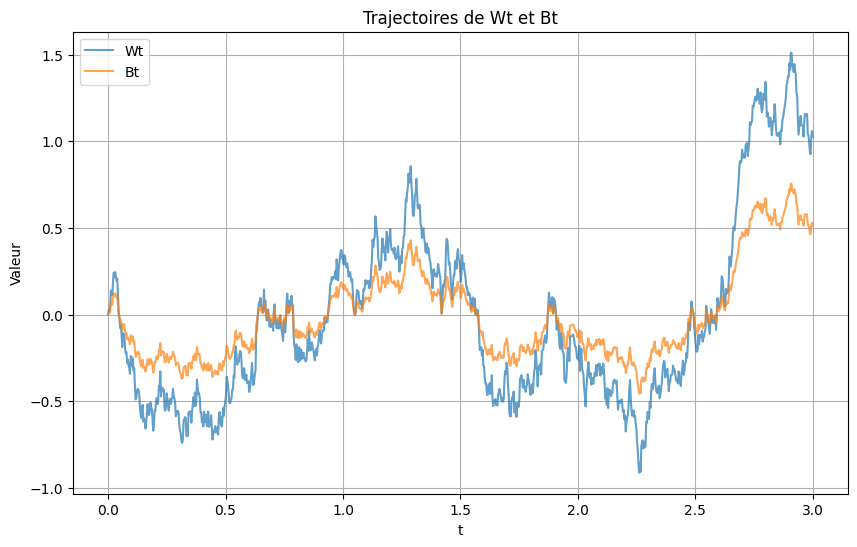

E[BT] = -0.006905948445823435
Var[BT] = 0.7539054344330648
Remarque: Bt est aussi un mouvement brownien, mais avec:
- Espérance nulle (théorique E[BT] = 0)
- Variance théorique: Var[BT] = T/c² = 0.75


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
T = 3
c = 2
N = 1000  # points de discrétisation
Nmc = 10000  # simulations Monte Carlo

# Temps
t = np.linspace(0, T, N)
dt = T/(N-1)

# Simulation d'une trajectoire
np.random.seed(42)  # Pour reproductibilité
dW = np.sqrt(dt) * np.random.normal(0, 1, N-1)
W = np.zeros(N)
W[1:] = np.cumsum(dW)  # Mouvement Brownien

# Calcul de Bt = (1/c)W(c²t)
B = W/c  # Bt = (1/c)Wt

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(t, W, label='Wt', alpha=0.7)
plt.plot(t, B, label='Bt', alpha=0.7)
plt.title('Trajectoires de Wt et Bt')
plt.xlabel('t')
plt.ylabel('Valeur')
plt.legend()
plt.grid(True)
plt.show()

# Simulations Monte Carlo pour E[BT] et Var[BT]
BT_samples = np.zeros(Nmc)
for i in range(Nmc):
    WT = np.sqrt(T) * np.random.normal(0, 1)
    BT_samples[i] = (1/c) * WT

E_BT = np.mean(BT_samples)
Var_BT = np.var(BT_samples)

print("E[BT] =", E_BT)
print("Var[BT] =", Var_BT)
print("\
Remarque: Bt est aussi un mouvement brownien, mais avec:")
print("- Espérance nulle (théorique E[BT] = 0)")
print("- Variance théorique: Var[BT] = T/c² =", T/(c**2))

EXERCICE 4

E[ST] = 32.307706450539904


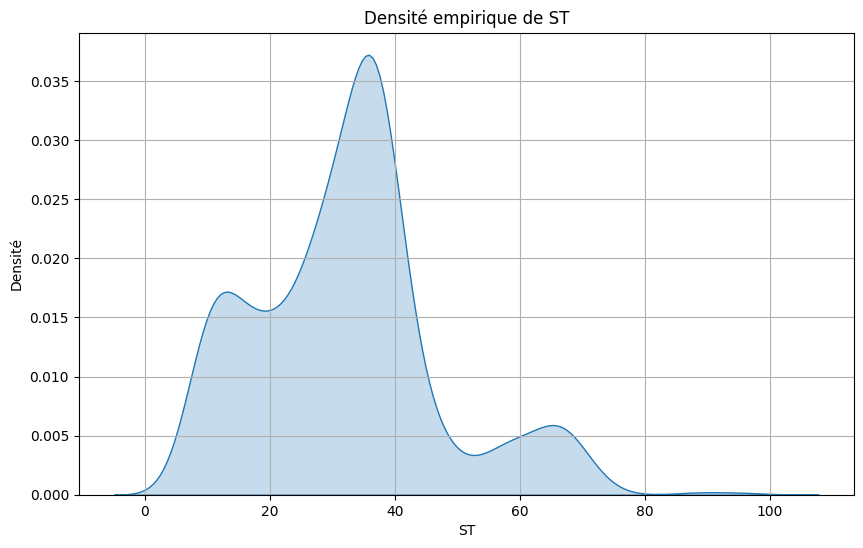

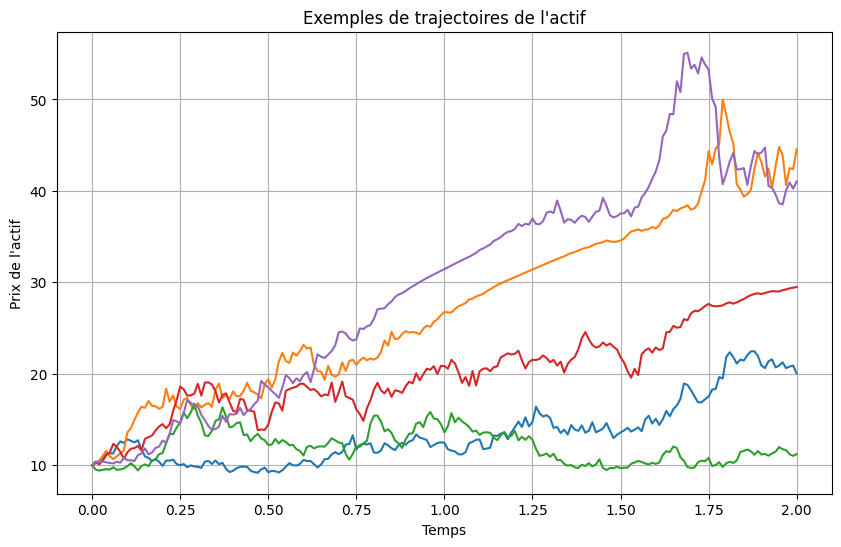

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Paramètres
Nmc = 1000  # nombre de simulations
T = 2
r0 = 0.8
sigma0 = 0.5
S0 = 10
dt = 0.01
t = np.arange(0, T + dt, dt)
N = len(t)

# Fonctions pour volatilité locale et taux d'intérêt
def sigma(S, S0, sigma0):
    return sigma0 * (np.sin(S/S0))**2

def r(t, T, r0):
    return r0 * (np.cos(t/T))**2

# Simulation des trajectoires
np.random.seed(42)
S = np.zeros((Nmc, N))
S[:, 0] = S0

for i in range(Nmc):
    for j in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))
        current_r = r(t[j-1], T, r0)
        current_sigma = sigma(S[i, j-1], S0, sigma0)
        S[i, j] = S[i, j-1] * (1 + current_r * dt + current_sigma * dW)

# Calcul de E[ST]
E_ST = np.mean(S[:, -1])
print("E[ST] = " + str(E_ST))

# Tracer la densité empirique de ST
plt.figure(figsize=(10, 6))
sns.kdeplot(data=S[:, -1], fill=True)
plt.title("Densité empirique de ST")
plt.xlabel("ST")
plt.ylabel("Densité")
plt.grid(True)
plt.show()

# Afficher quelques trajectoires
plt.figure(figsize=(10, 6))
for i in range(5):  # Afficher 5 trajectoires pour exemple
    plt.plot(t, S[i, :])
plt.title("Exemples de trajectoires de l'actif")
plt.xlabel("Temps")
plt.ylabel("Prix de l'actif")
plt.grid(True)
plt.show()

EXERCICE 5

theta = 0.00, E[U(MT)] = -4.539992976248486e-05
theta = 0.05, E[U(MT)] = -4.4237197111627385e-05
theta = 0.10, E[U(MT)] = -4.38876631719078e-05
theta = 0.15, E[U(MT)] = -4.360148729952085e-05
theta = 0.20, E[U(MT)] = -4.3453340695696866e-05
theta = 0.25, E[U(MT)] = -4.373222600089978e-05
theta = 0.30, E[U(MT)] = -4.5207316693143026e-05
theta = 0.35, E[U(MT)] = -4.628682999415647e-05
theta = 0.40, E[U(MT)] = -4.758722328771571e-05
theta = 0.45, E[U(MT)] = -4.856547056707551e-05
theta = 0.50, E[U(MT)] = -5.192134036700366e-05
theta = 0.55, E[U(MT)] = -5.1353896116970885e-05
theta = 0.60, E[U(MT)] = -6.0652440497266e-05
theta = 0.65, E[U(MT)] = -6.147603392444697e-05
theta = 0.70, E[U(MT)] = -6.682309384186265e-05
theta = 0.75, E[U(MT)] = -6.518696257654455e-05
theta = 0.80, E[U(MT)] = -7.764495953727652e-05
theta = 0.85, E[U(MT)] = -7.600809804811011e-05
theta = 0.90, E[U(MT)] = -8.620096252457686e-05
theta = 0.95, E[U(MT)] = -9.12877493771254e-05
theta = 1.00, E[U(MT)] = -0.000101921236

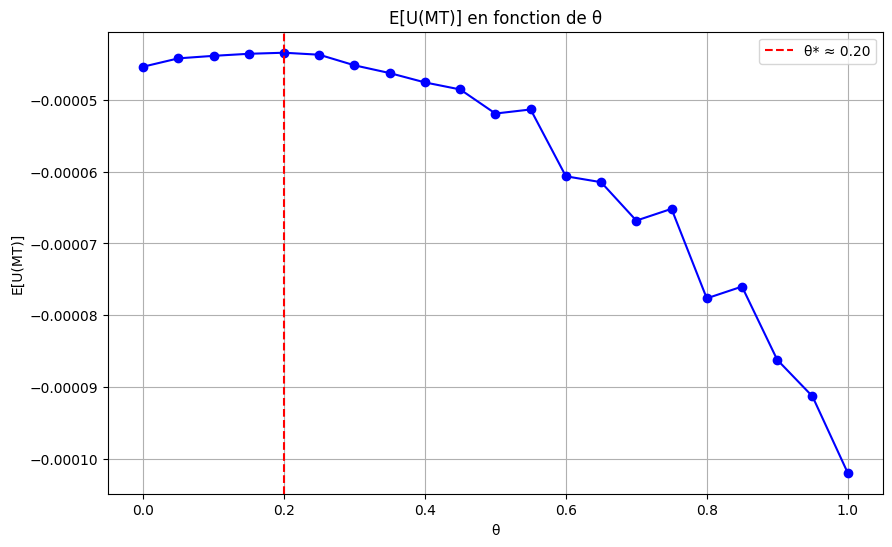

Theta optimal trouvé: 0.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
M0 = 100  # Richesse initiale
Y0 = 10   # Valeur initiale de l'actif risqué
sigma0 = 0.2  # Volatilité initiale
eta = 0.1  # Aversion au risque
mu = 0.1  # Rendement attendu
rho = 0.7  # Coefficient de corrélation
kappa = 0.5  # Vitesse de réversion
theta_vol = 0.2  # Volatilité de la volatilité
sigma_bar = 0.2  # Niveau moyen de la volatilité
T = 1  # Horizon temporel
N = 100  # Nombre de pas de temps
Nmc = 1000  # Nombre de simulations Monte Carlo

def simulate_MT(theta):
    dt = T / N
    MT = np.zeros(Nmc)

    for sim in range(Nmc):
        M = M0
        Y = Y0
        sigma = sigma0

        dW1 = np.random.normal(0, np.sqrt(dt), N)
        dW2 = rho * dW1 + np.sqrt(1 - rho**2) * np.random.normal(0, np.sqrt(dt), N)

        for i in range(N):
            dY = Y * (mu * dt + sigma * dW1[i])
            Y += dY

            dsigma = kappa * (sigma_bar - sigma) * dt + theta_vol * np.sqrt(sigma) * dW2[i]
            sigma += dsigma

            dM = theta * M * (dY / Y)
            M += dM

        MT[sim] = M

    return MT

# Fonction d'utilité
def utility(x):
    return -np.exp(-eta * x)

# Calcul pour différentes valeurs de theta
theta_range = np.linspace(0, 1, 21)
E_U_values = []

for theta in theta_range:
    MT = simulate_MT(theta)
    E_U = np.mean(utility(MT))
    E_U_values.append(E_U)
    print(f"theta = {theta:.2f}, E[U(MT)] = {E_U}")

# Tracer le graphe
plt.figure(figsize=(10, 6))
plt.plot(theta_range, E_U_values, 'b-o')
plt.title('E[U(MT)] en fonction de θ')
plt.xlabel('θ')
plt.ylabel('E[U(MT)]')
plt.grid(True)

# Trouver le theta optimal
theta_optimal = theta_range[np.argmax(E_U_values)]
plt.axvline(x=theta_optimal, color='r', linestyle='--', label=f'θ* ≈ {theta_optimal:.2f}')
plt.legend()
plt.show()

print("\
Theta optimal trouvé:", theta_optimal)

EXERCICE 6

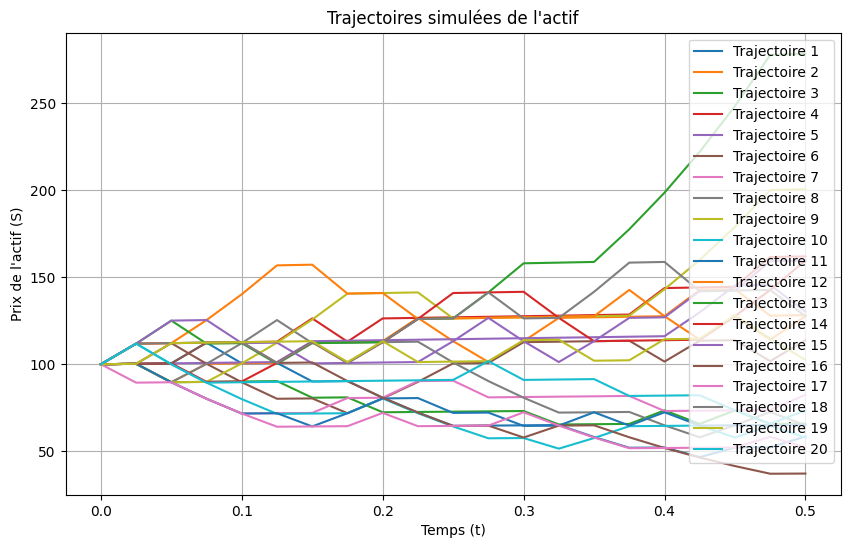

E[ST] calculé: 112.37268473855033


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
dt = 0.5 / 20  # Intervalle de temps
r = 0.1  # Taux sans risque
sigma = 0.5  # Volatilité
N = 20  # Nombre de pas de temps
Nmc = 20  # Nombre de trajectoires Monte Carlo
S0 = 100  # Prix initial de l'actif

# Calcul des paramètres de l'arbre trinomial
u = np.exp(sigma * np.sqrt(2 * dt))
d = np.exp(-sigma * np.sqrt(2 * dt))
A = np.exp(r * dt / 2)
B = np.exp(-sigma * np.sqrt(dt) / 2)

p = ((A - B) / (1 / B - B))**2
q = ((1 / B - A) / (1 / B - B))**2

# Simulation des trajectoires
trajectories = np.zeros((Nmc, N + 1))
trajectories[:, 0] = S0

for sim in range(Nmc):
    for n in range(1, N + 1):
        rand = np.random.random()
        if rand < p:
            trajectories[sim, n] = trajectories[sim, n - 1] * u
        elif rand < p + (1 - p - q):
            trajectories[sim, n] = trajectories[sim, n - 1] * (1 + r * dt)
        else:
            trajectories[sim, n] = trajectories[sim, n - 1] * d

# Calcul de E[ST]
ST = trajectories[:, -1]
E_ST = np.mean(ST)

# Affichage des trajectoires
plt.figure(figsize=(10, 6))
for sim in range(Nmc):
    plt.plot(np.linspace(0, 0.5, N + 1), trajectories[sim], label=f'Trajectoire {sim + 1}')
plt.title('Trajectoires simulées de l\'actif')
plt.xlabel('Temps (t)')
plt.ylabel('Prix de l\'actif (S)')
plt.grid(True)
plt.legend()
plt.show()

print("E[ST] calculé:", E_ST)

In [ ]:
# Save the plot as an image file
file_path = "/mnt/data/C_gamma_region.png"
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, C_gamma_region, levels=1, colors=["#d2b48c"], alpha=0.7)  # Brown color for the region
plt.plot(x, 2 * gamma - x, 'r-', label=r"$x + y = 2\gamma$", linewidth=2)

# Add labels and limits
plt.title(r"Graphical Representation of $C_\gamma$ ($\gamma = {}$)".format(gamma))
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.xlim(0, 2*gamma)
plt.ylim(0, 2*gamma)
plt.legend()
plt.grid(alpha=0.3)

# Save the figure
plt.savefig(file_path)
file_path


NameError: name 'plt' is not defined

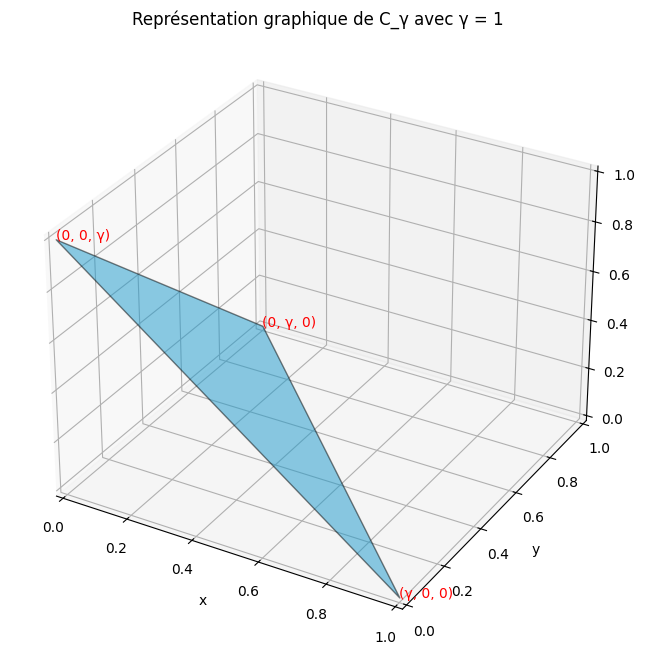

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Paramètre γ
gamma = 1

# Sommets du triangle dans le premier octant pour x + y + z = γ
vertices = np.array([
    [gamma, 0, 0],  # Point sur l'axe x
    [0, gamma, 0],  # Point sur l'axe y
    [0, 0, gamma]   # Point sur l'axe z
])

# Création de la figure 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Ajout du triangle
triangle = Poly3DCollection([vertices], alpha=0.5, edgecolor='k')
triangle.set_facecolor((0.1, 0.6, 0.8, 0.5))  # Couleur bleu translucide
ax.add_collection3d(triangle)

# Limites des axes pour rester dans le premier octant
ax.set_xlim(0, gamma)
ax.set_ylim(0, gamma)
ax.set_zlim(0, gamma)

# Annotation des sommets
ax.text(gamma, 0, 0, "(γ, 0, 0)", color='red')
ax.text(0, gamma, 0, "(0, γ, 0)", color='red')
ax.text(0, 0, gamma, "(0, 0, γ)", color='red')

# Étiquettes des axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Titre
ax.set_title(f"Représentation graphique de C_γ avec γ = {gamma}")

plt.show()


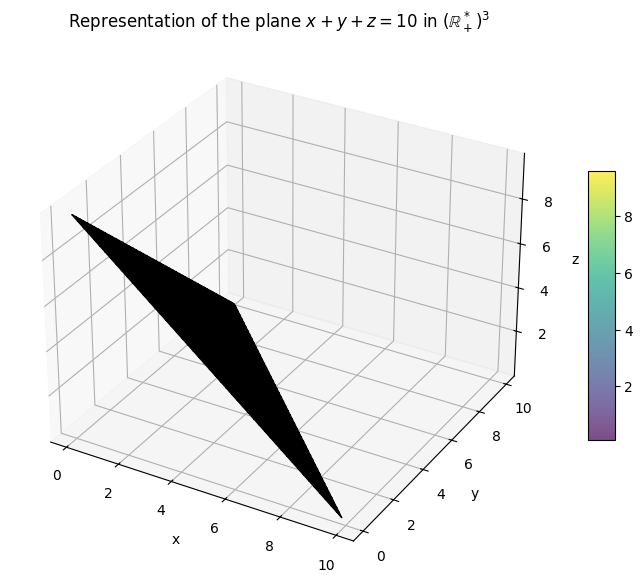

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the plane x + y + z = gamma (example: gamma = 1)
gamma = 10

# Generate points for the plane within reasonable bounds for visualization
x = np.linspace(0.1, gamma - 0.1, 100)
y = np.linspace(0.1, gamma - 0.1, 100)
X, Y = np.meshgrid(x, y)
Z = gamma - X - Y

# Mask Z to show only points where all variables are positive
Z = np.where(Z > 0, Z, np.nan)

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.7)

# Labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(f"Representation of the plane $x + y + z = {gamma}$ in $(\mathbb{{R}}_+^*)^3$")

# Add a color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.show()
